[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/Spam_Detection.ipynb)

In [23]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [24]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/Spam_Detection/spam.csv", encoding ='ISO-8859-1')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5854 non-null   object
 1   label   5854 non-null   object
dtypes: object(2)
memory usage: 91.6+ KB


In [26]:
df

,email,label
0,Subject: re : rankings\nthank you .,ham
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,Subject: research group move to the 19 th floo...,ham
3,Subject: christmas baskets\nthe christmas bask...,ham
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham
...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam
5850,"Subject: localized software , all languages av...",spam
5851,Subject: instant branded software download\nso...,spam
5852,"Subject: localized software , all languages av...",spam


In [27]:
df['email'][1]

'Subject: re : visit to enron\nvince ,\ndec . 29 at 9 : 00 will be fine . i have talked to shirley and have\ndirections .\nthanks , bob\nvince j kaminski wrote :\n> bob ,\n>\n> can you come to our office on dec 29 at 9 : 00 a . m . ?\n>\n> please , call shirley crenshaw ( 3 - 5290 ) or stinson gibner ( 3 - 4748 )\n> from the reception to be admitted to the building .\n>\n> vince kaminski'

In [28]:
df.groupby('label').count()

,email
label,
ham,4358
spam,1496


<Axes: >

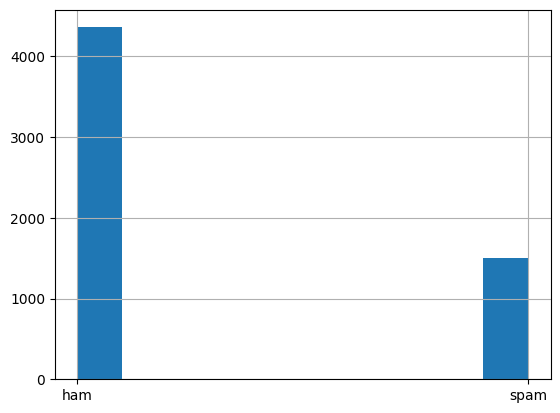

In [29]:
df['label'].hist()

In [30]:
# Create binary labels
df['b_label'] = df['label'].map({'ham': 0, 'spam' : 1})

In [31]:
Y = df['b_label'].to_numpy()

In [32]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
x_train, x_test,Y_train, Y_test = train_test_split(df["email"], Y,  test_size = 0.33)

In [34]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
# now let's vectorize our data
vectors = CountVectorizer(decode_error = 'ignore' )
Xtrain = vectors.fit_transform(x_train)
Xtest = vectors.transform(x_test)

In [38]:
Xtrain

<3922x33318 sparse matrix of type '<class 'numpy.int64'>'
	with 487136 stored elements in Compressed Sparse Row format>

In [39]:
model = MultinomialNB()
model.fit(Xtrain, Y_train)
print("train accuracy:", model.score(Xtrain, Y_train))
print("test accuracy:", model.score(Xtest, Y_test))

train accuracy: 0.9964303926568078
test accuracy: 0.9927536231884058


In [42]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Y_train,Ptrain))
print("test F1:", f1_score(Y_test,Ptest))

train F1: 0.9930348258706467
test F1: 0.9858870967741935


In [45]:
cm = confusion_matrix(Y_train, Ptrain)
cm_test = confusion_matrix(Y_test, Ptest)

In [46]:
cm_test

array([[1429,    6],
       [   8,  489]])

In [49]:
to_plot = pd.DataFrame(cm_test)

In [50]:
to_plot

,0,1
0,1429,6
1,8,489


In [56]:
import seaborn as sns
def plot_confusion_matrix(cm, classes, title):
  to_plot = pd.DataFrame(cm, index= classes, columns=classes)
  plt.figure(figsize=(14,7))
  plt.title(title)
  sns.heatmap(data= to_plot, annot = True, fmt = 'g')
  plt.xlabel("predicted")
  plt.ylabel("real")


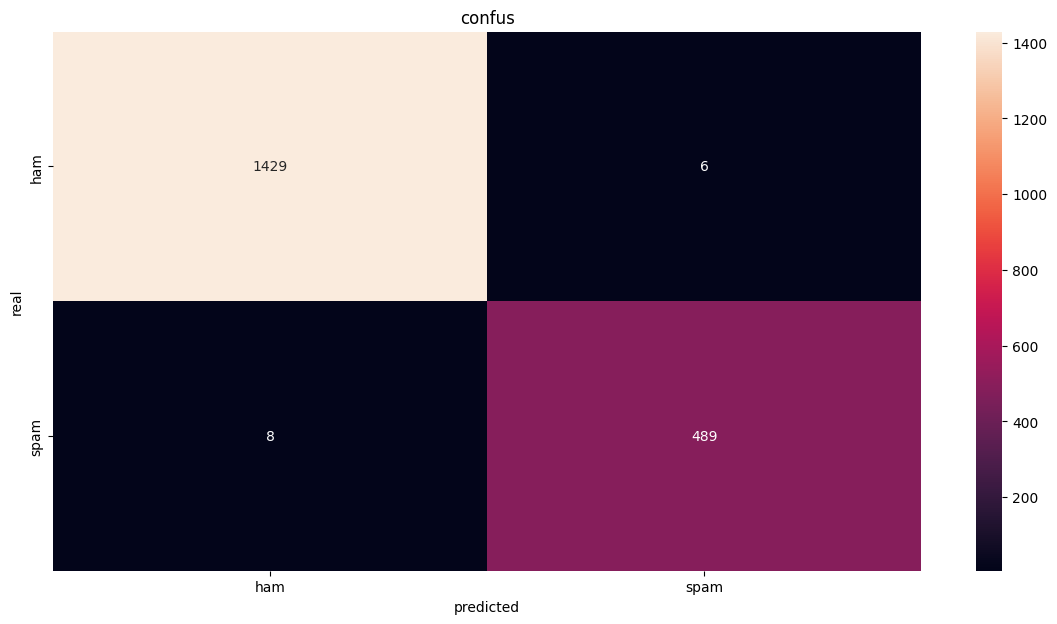

In [57]:
plot_confusion_matrix(cm_test, ['ham','spam'], 'confus')

In [67]:
# Vizualize original data

def vizu(label) :
  words =''
  for msg in df[df['label'] == label]['email']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width = 600, height = 400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()



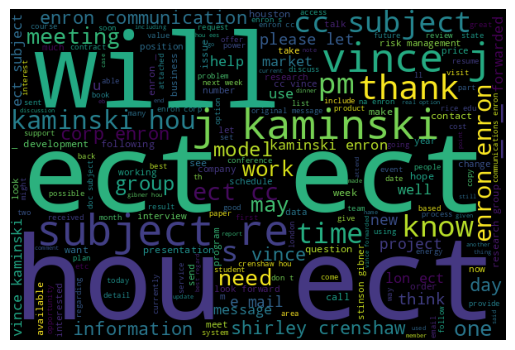

In [68]:
vizu('ham')

In [69]:
# Now let's predict all our mails and see the prediction
X = vectors.transform(df['email'])
preds = model.predict(X)
df['prediction'] = preds
df


,email,label,b_label,prediction
0,Subject: re : rankings\nthank you .,ham,0,0
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham,0,0
2,Subject: research group move to the 19 th floo...,ham,0,0
3,Subject: christmas baskets\nthe christmas bask...,ham,0,0
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham,0,0
...,...,...,...,...
5849,"Subject: tetm : 22 , interest : 3 . 55 %\nha h...",spam,1,1
5850,"Subject: localized software , all languages av...",spam,1,1
5851,Subject: instant branded software download\nso...,spam,1,1
5852,"Subject: localized software , all languages av...",spam,1,1


In [75]:
false_spam = df[(df['prediction'] == 0) & (df['b_label'] == 1)]
false_spam['email'][4375]

'Subject: join focus groups to earn money\na la carte research recruits for focus groups across the country . focus groups\nare an easy way to make some extra money for just a couple of hours of your\ntime . each group is only for the purpose of learning your opinions . you can\nbe assured that there will be no sales presentation , and you will not be asked\nto buy anything . everything that is mentioned will be held in the strictest of\nconfidence . focus groups let you express your opinions on whatever subject is\nbeing discussed and we actually pay you for those opinions .\nif you would like to be added to our list of possible future respondents , then\nclick to fill out the registration form . if you have any questions about this\nquestionnaire , please e - mail me at register @ alacarteresearch . com\nsincerely ,\njohn mooney'